In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from IPython.display import display, clear_output

import torch

from random import randint

from src.action import Action
from src.agent import Agent
from src.config import Config
from src.state import State
from src.world import World

# Init 
----

In [2]:
config = Config()
world = World.create_from_config(config=config)
state = State.create_from(
    config=config,
    id="earth",
    x=randint(config.world_min_x, config.world_max_x),
    y=randint(config.world_min_y, config.world_max_y),
)
agent = Agent.create_from(id="earth", state=state)

In [3]:
state

State(config=<src.config.Config object at 0x16c629f90>, id='earth', x=1, y=10)

# Draw agent action history
----

In [4]:
for step in range(20):
    action_idx = randint(0, len(config.possible_actions) - 1)
    agent.take_action(action=Action.create_from(config=config, action_idx=action_idx))

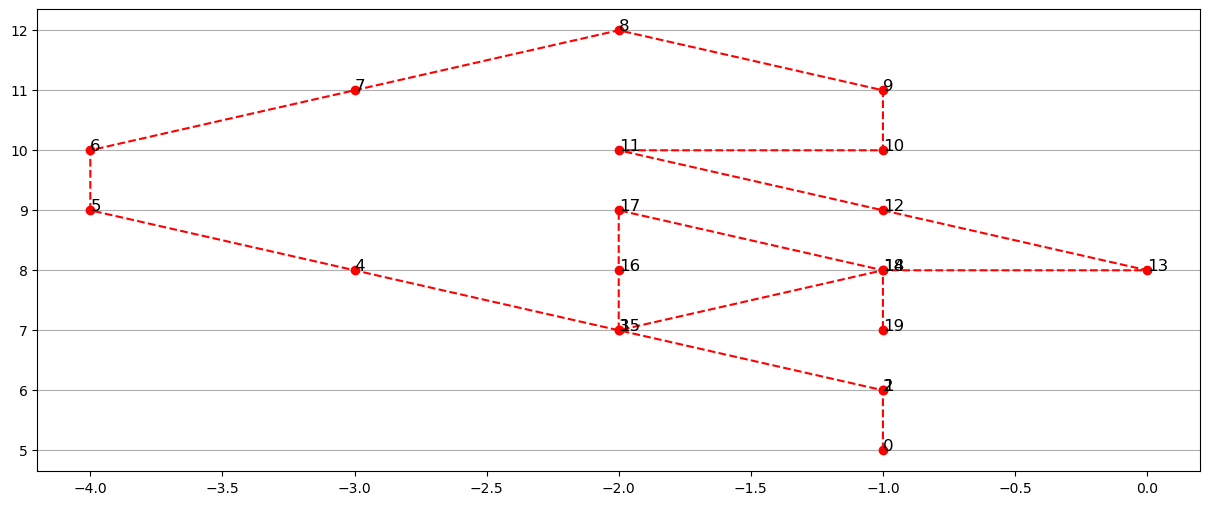

In [5]:
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(1, 1, 1)
world.viz(ax=ax, agent=agent, config=config)
plt.show()